In [1]:
from multiatomic import *

In [2]:
def calcAcf(data):
    data_ = data - np.mean(data)
    acf = np.correlate(data_, data_, mode = "full")
    acf = acf/np.var(data)/len(data)  
    acf_ = acf[acf.size // 2:]
    return acf_

In [3]:
vvdata = pd.read_table('vv.out', sep = '\s+')
acf = calcAcf(vvdata["Position"])

1527.8120704 2501


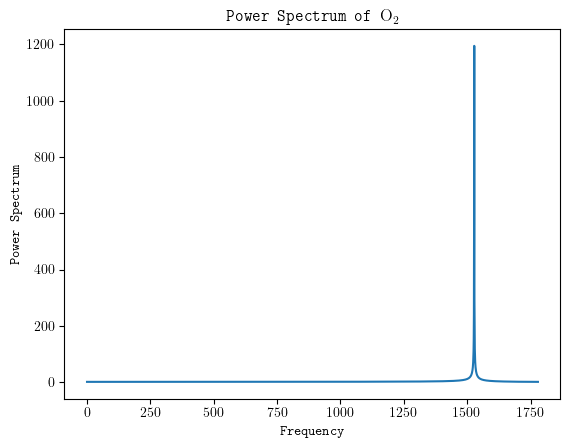

In [4]:
deltaT = 0.001
powerSpectrum = np.abs(np.fft.rfftn(acf))
nframe = len(vvdata["Position"])
nfreq = len(powerSpectrum)
x = np.arange(nfreq)
x_ = (x/deltaT*11.1188*4)/62500
plt.plot(x_, powerSpectrum)
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("Power Spectrum of $\mathrm{O_2}$")
plt.savefig("o2Interpolated")
print(x_[np.argmax(powerSpectrum)], nfreq)